Most of this code can be found at <a href='https://keras.io'>keras.io</a>

# Useful Inputs

In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [4]:
from keras.models import Sequential

model = Sequential()

W0407 14:17:09.389389 140735865734016 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

In [5]:
from keras.layers import Dense

model.add(Dense(units=4, activation='relu', input_dim=4))
model.add(Dense(units=3, activation='softmax'))

W0407 14:17:10.220986 140735865734016 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0407 14:17:10.225989 140735865734016 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Compile the model to a form that the computer can more easily work with

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

W0407 14:17:13.118282 140735865734016 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0407 14:17:13.131981 140735865734016 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Using the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [7]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=1)

W0407 14:17:14.432915 140735865734016 deprecation.py:323] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0407 14:17:14.492518 140735865734016 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
90/90 [==============================] - 0s 2ms/step - loss: 1.1527
Epoch 2/50
90/90 [==============================] - 0s 105us/step - loss: 1.1440
Epoch 3/50
90/90 [==============================] - 0s 97us/step - loss: 1.1333
Epoch 4/50
90/90 [==============================] - 0s 108us/step - loss: 1.1204
Epoch 5/50
90/90 [==============================] - 0s 120us/step - loss: 1.1079
Epoch 6/50
90/90 [==============================] - 0s 113us/step - loss: 1.0954
Epoch 7/50
90/90 [==============================] - 0s 104us/step - loss: 1.0831
Epoch 8/50
90/90 [==============================] - 0s 107us/step - loss: 1.0705
Epoch 9/50
90/90 [==============================] - 0s 110us/step - loss: 1.0581
Epoch 10/50
90/90 [==============================] - 0s 119us/step - loss: 1.0455
Epoch 11/50
90/90 [==============================] - 0s 136us/step - loss: 1.0327
Epoch 12/50
90/90 [==============================] - 0s 98us/step - loss: 1.0198
Epoch 13/50
90/90 [==========

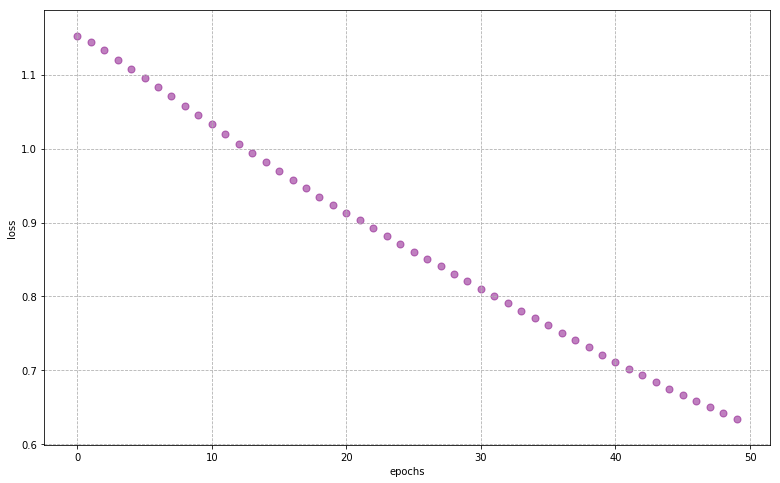

In [8]:
def plot_history(history, figsize=(13, 8), color='purple', s=50, alpha=0.5):
    plt.figure(figsize=figsize)
    plt.grid(zorder=0, linestyle='--')
    plt.scatter(history.epoch, history.history["loss"], c=color, s=s, alpha=alpha)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
plot_history(history)

In [9]:
### Let's build a new model and add another layer
model_mlp = Sequential()

model_mlp.add(Dense(input_dim=4, units=4, activation='relu'))
model_mlp.add(Dense(units=4, activation='relu'))
model_mlp.add(Dense(units=3, activation='softmax'))

model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


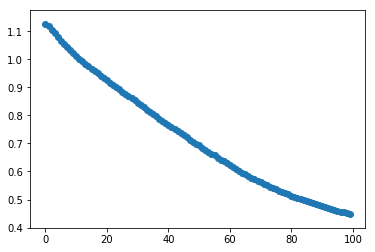

In [10]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history = model_mlp.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
plt.scatter(history.epoch, history.history["loss"])

In [11]:
optimizer_dict = {"adam_001": {"optimizer": optimizers.Adam(), "color": "blue"},
                  "adam_01": {"optimizer": optimizers.Adam(lr=0.01), "color": "orange"},
                  "sgd_nag": {"optimizer": optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True), "color": "pink"},
                  "sgd": {"optimizer": optimizers.SGD(lr=0.001), "color": "red"},
                  "adagrad": {"optimizer": optimizers.Adagrad(), "color": "yellow"},
                  "adadelta": {"optimizer": optimizers.Adadelta(), "color": "teal"}}

In [12]:
for label, optimizer in optimizer_dict.items():
    # Build Model
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=4))
    model.add(Dense(units=12, activation='relu', input_dim=4))
    model.add(Dense(units=3, activation='softmax'))
    
    # compile model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer['optimizer'])
    
    # train our model and get our history
    history = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
    
    # store history to our dictionary
    optimizer_dict[label]['history'] = history
    print(f"Finished fitting {label} optimizer")

Finished fitting adam_001 optimizer
Finished fitting adam_01 optimizer
Finished fitting sgd_nag optimizer
Finished fitting sgd optimizer
Finished fitting adagrad optimizer
Finished fitting adadelta optimizer


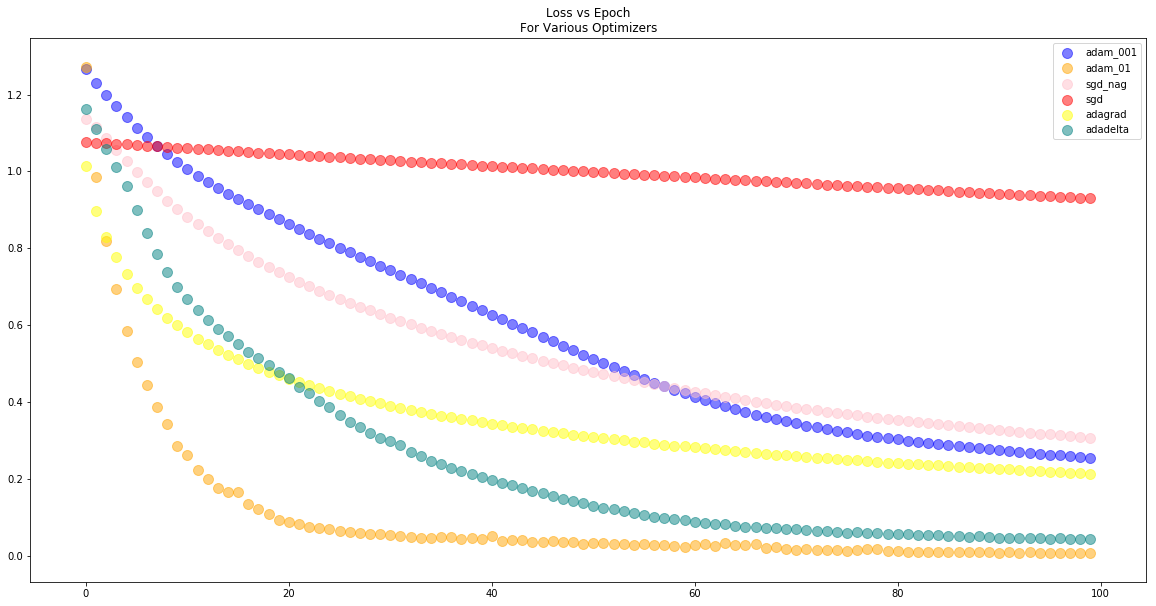

In [13]:
plt.figure(figsize=(20, 10))
for label, optdict in optimizer_dict.items():
    history = optdict['history']
    color = optdict["color"]
    plt.scatter(history.epoch, history.history["loss"], alpha=0.5, color=color, label=label, s=100)
plt.legend()
plt.title("Loss vs Epoch\nFor Various Optimizers")
plt.show()